<a href="https://colab.research.google.com/github/eminshall/FreeCodeCamp-Projects-TensorFlow/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-01-17 09:57:42--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-01-17 09:57:42 (4.69 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
df = dataset.copy()

In [4]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['region'] = labelencoder.fit_transform(df['region'])

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['expenses'], axis=1)  
y = df["expenses"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [7]:
model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae', 'mse'])

In [8]:
# Build and compile model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,686
Trainable params: 4,673
Non-trainable params: 13
_________________________________________________________________


In [9]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=600)

Epoch 1/600
27/27 [==============================] - 3s 45ms/step - loss: 13517.5000 - mae: 13517.5000 - mse: 325437280.0000 - val_loss: 12652.9404 - val_mae: 12652.9404 - val_mse: 310293504.0000
Epoch 2/600
27/27 [==============================] - 1s 30ms/step - loss: 13514.0703 - mae: 13514.0703 - mse: 325332416.0000 - val_loss: 12647.9600 - val_mae: 12647.9600 - val_mse: 310152000.0000
Epoch 3/600
27/27 [==============================] - 0s 15ms/step - loss: 13507.0938 - mae: 13507.0938 - mse: 325119872.0000 - val_loss: 12638.3584 - val_mae: 12638.3584 - val_mse: 309881952.0000
Epoch 4/600
27/27 [==============================] - 0s 14ms/step - loss: 13494.3408 - mae: 13494.3408 - mse: 324744928.0000 - val_loss: 12621.5186 - val_mae: 12621.5186 - val_mse: 309409536.0000
Epoch 5/600
27/27 [==============================] - 1s 19ms/step - loss: 13472.8965 - mae: 13472.8965 - mse: 324101472.0000 - val_loss: 12594.6006 - val_mae: 12594.6006 - val_mse: 308661728.0000
Epoch 6/600
27/27 [=

In [10]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

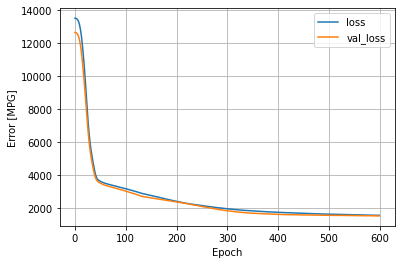

In [11]:
plot_loss(history)

9/9 - 0s - loss: 1395.2509 - mae: 1395.2509 - mse: 19112992.0000 - 39ms/epoch - 4ms/step
Testing set Mean Abs Error: 1395.25 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


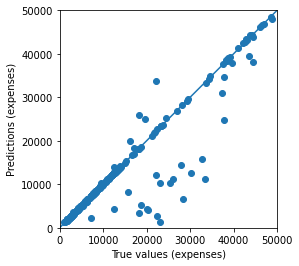

In [12]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
#Only changed the variable names from test_dataset to x_test, etc.
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
